In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import seaborn as sns



In [2]:
# import vade
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = "5G5qJbC2JnSOK7X0LuyBgdl1s"
consumer_secret = "SI1R97cioH9us6qzbV8lLfCdVzColdV7zZGdvDzivyJ8TD4JUx"
access_token = "358992061-DyzdZ3Ah4dayoVnmXTHH2ML2PguUVrGdSGNfSUgf"
access_token_secret = "dRGIIiZEkbfCuOME3uInFlyUUWixnjzHgzAeRVm79Y0eB"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
news_accounts = ['BBCWORLD','NYT','FoxNews','CBSNews','CNN', 'Politico']


In [5]:
public_tweet = api.user_timeline(news_accounts[0])

In [7]:
print(json.dumps(public_tweet[10], indent = 4, sort_keys= True, separators=(',', ': ')))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sun Jan 07 13:22:38 +0000 2018",
    "entities": {
        "hashtags": [],
        "media": [
            {
                "display_url": "pic.twitter.com/RgjBp9otcH",
                "expanded_url": "https://twitter.com/BBCWorld/status/949994688702017536/photo/1",
                "id": 949994352146898945,
                "id_str": "949994352146898945",
                "indices": [
                    115,
                    138
                ],
                "media_url": "http://pbs.twimg.com/media/DS8O1HpX4AEISri.jpg",
                "media_url_https": "https://pbs.twimg.com/media/DS8O1HpX4AEISri.jpg",
                "sizes": {
                    "large": {
                        "h": 512,
                        "resize": "fit",
                        "w": 1024
                    },
                    "medium": {
                        "h": 512,
                        "resize": "fit",
            

In [9]:
news_accounts = ['BBCWORLD','NYT','FoxNews','CBSNews','CNN', 'Politico']

In [10]:
#set counter to one for tweets ago
counter = 1
sentiment = []

#loop through each twitter handle in news_accounts
for account in news_accounts:
    
    counter = 1 
    #loop through 5 pages of 20 tweets
    for x in range (5):
        account_tweets = api.user_timeline(account,page = x)
        
        for tweet in account_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            
           
            #make a dictonary for each item retrieved  
            sentiment.append({'User':account,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            
            counter = counter + 1
   
        

In [9]:
#make a data frame from the dictonary
sentiment_tweets = pd.DataFrame.from_dict(sentiment)

In [10]:
sentiment_tweets.max()

Compound                              0.8955
Date          Wed Dec 13 23:03:23 +0000 2017
Negative                                   1
Neutral                                0.672
Positive                               0.515
Tweets Ago                               100
User                                Politico
dtype: object

In [11]:
#reduced the amount of columns we use
sentiment_filtered = sentiment_tweets[['Compound','Tweets Ago','User']]




In [12]:
sentiment_tweets_1 = sentiment_filtered[sentiment_filtered['User']=='CBSNews']
sentiment_tweets_1['Compound'].mean()

-0.039213

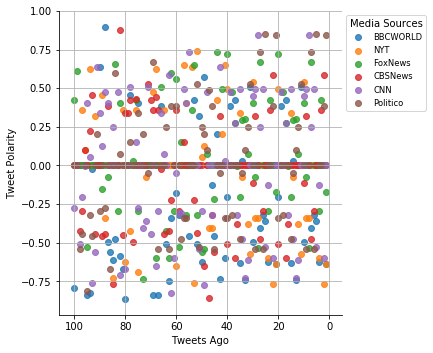

In [13]:
#sctter plot showing the polarity of tweets
palette_color = sns.color_palette()
twitter_scatter = sns.lmplot(x='Tweets Ago', y='Compound', 
                             data=sentiment_filtered,hue='User' ,
                             palette=palette_color
                            ,fit_reg= False, legend = False,)

plt.ylim(ymax = 1)
#inverts the x-axis
plt.gca().invert_xaxis()
plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)
plt.ylabel('Tweet Polarity')
plt.savefig('Scatter_Plot_Polarity')
plt.grid(True)
plt.show()

In [33]:
#find the mean sentiment score for each user
df_bar_grouping = sentiment_filtered.groupby(['User']).mean()['Compound']


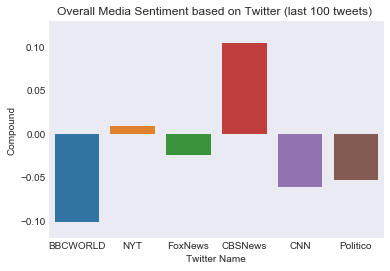

In [63]:
#bar chart 
sns.set_style(style='dark')

bar_tweet = sns.barplot(x='User', y='Compound', data=sentiment_filtered, ci=False)
plt.title('Overall Media Sentiment based on Twitter (last 100 tweets) ')
plt.xlabel('Twitter Name')

plt.ylim(ymax = .13)
plt.ylim(ymin = -.12)
plt.savefig('Overall_Media_Senttiment_Bar_Chart')
plt.show()